In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [156]:
data = pd.read_csv('data/train.csv')

In [157]:
data.shape

(12330, 18)

In [162]:
#data.drop(['Month','VisitorType','Weekend','Revenue'], axis = 1)
del data['Month']
del data['VisitorType']
del data['Weekend']
del data['Revenue']

In [163]:
# view first 5 columns of dataframe
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,1,1,1,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,1,2
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,4,1,9,3
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,3,2,2,4
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,3,3,1,4


In [164]:
# info about features, their data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 14 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
dtypes: float64(10), int64(4)
memory usage: 1.3 MB


In [165]:
# basic statistics about features
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


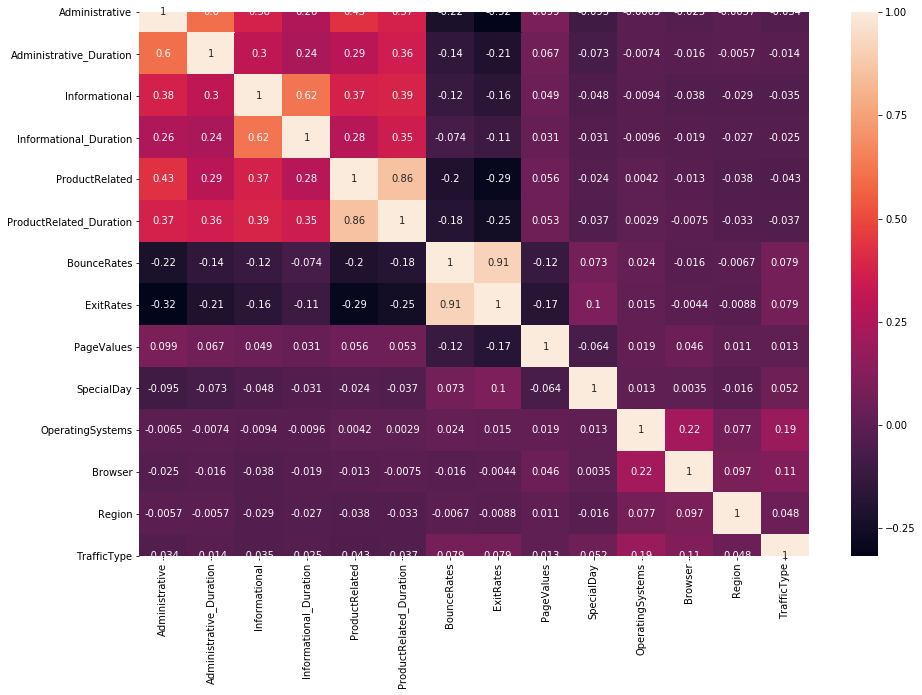

In [166]:
# correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)

In [167]:
# boxplot grid
def build_grid(y, nrows, ncols):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16))
    for idx, ax in enumerate(axes.flat):
        sns.boxplot(x='TrafficType', y=y[idx], data=data, ax=ax)

In [168]:
X, Y = data.iloc[:,:-1], data['TrafficType']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [169]:
# scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [170]:
def print_metrics(classifier, X, Y):
    prediction = classifier.predict(X)
    print(classification_report(Y, prediction))

In [171]:
# decision tree training

def train_decesion_tree(X_train, Y_train):
    tree_param_grid = {'max_depth': [5, 6, 7, 8, 9, 10], 'criterion': ['gini', 'entropy']} 
    tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_param_grid, verbose=1)
    tree_grid.fit(X_train, Y_train)
    
    print(f'Optimal parameters: {tree_grid.best_params_}')
    return tree_grid

In [173]:
X, Y

(       Administrative  Administrative_Duration  Informational  \
 0                 0.0                      0.0            0.0   
 1                 0.0                      0.0            0.0   
 2                 0.0                     -1.0            0.0   
 3                 0.0                      0.0            0.0   
 4                 0.0                      0.0            0.0   
 ...               ...                      ...            ...   
 12325             3.0                    145.0            0.0   
 12326             0.0                      0.0            0.0   
 12327             0.0                      0.0            0.0   
 12328             4.0                     75.0            0.0   
 12329             0.0                      0.0            0.0   
 
        Informational_Duration  ProductRelated  ProductRelated_Duration  \
 0                         0.0             1.0                 0.000000   
 1                         0.0             2.0          

In [172]:
tree = train_decesion_tree(X_train, Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\users\pride\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\pride\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\pride\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the beh

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
print('Metrics for train set:')
print_metrics(tree, X_train, Y_train)
print('Metrics for test set:')
print_metrics(tree, X_test, Y_test)

In [ ]:
# train random forest classifier

rf_clf = RandomForestClassifier(n_estimators=65,
                                n_jobs=2, 
                                random_state=0, 
                                criterion='entropy',
                                max_depth=None)
rf_clf.fit(X, Y)
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_],
             axis=0)

In [ ]:
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
indices

In [ ]:
data.columns[indices]

In [ ]:
rf_clf.fit(X_train, Y_train)

In [ ]:
print('Metrics for train set:')
print_metrics(rf_clf, X_train, Y_train)
print('Metrics for test set:')
print_metrics(rf_clf, X_test, Y_test)

In [ ]:
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d.  %str (%f)" % (f + 1, data.columns[f], importances[indices[f]]))
    
    # Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
importances